In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [20]:
df_train = pd.read_csv("df_train.csv")

In [21]:
df_train.set_index(keys = "CustomerID", inplace = True)

In [101]:
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)
df_train.describe()

,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.321057,0.220286,0.245286,0.497324,0.205576,0.134359,0.107225,0.137302,0.135843,0.170908,0.153027,0.462747,0.159774,0.445429,0.263914,0.010286,0.079143,0.073286,0.083000,0.065857,0.014286,0.733286,0.703429,0.500852,0.496857,0.502571,0.095000,0.163143,0.213714,0.653143,0.219714,0.035000,0.137660
std,0.150587,0.271739,0.271087,0.291668,0.224992,0.197951,0.150486,0.202368,0.201563,0.199401,0.144185,0.211195,0.138798,0.253516,0.137430,0.100903,0.269981,0.260624,0.275902,0.248050,0.118675,0.442273,0.456779,0.210461,0.290167,0.500029,0.293236,0.369522,0.409957,0.476004,0.414083,0.183793,0.152384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208774,0.000000,0.000000,0.242424,0.016689,0.010050,0.009240,0.010050,0.010050,0.036145,0.062500,0.307692,0.041667,0.230769,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350877,0.246066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015840
50%,0.317659,0.000000,0.000000,0.494949,0.121495,0.045226,0.042735,0.045226,0.045226,0.096386,0.125000,0.461538,0.125000,0.384615,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.491228,0.488555,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.080238
75%,0.423237,0.500000,0.500000,0.747475,0.338451,0.170854,0.146108,0.175879,0.170854,0.228916,0.187500,0.615385,0.208333,0.615385,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.666667,0.748212,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.217713
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df_train.head()

,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
0,0.473975,0.0,0.0,0.434343,0.309746,0.849246,0.219450,0.562814,0.141206,0.618474,0.1250,0.769231,0.291667,0.538462,0.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.421053,0.766810,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.218959
1,0.475463,0.0,0.0,0.747475,0.472630,0.924623,0.293370,0.462312,0.306533,0.184739,0.0625,0.384615,0.375000,0.923077,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.543860,0.636624,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.317671
2,0.480477,0.0,0.0,0.858586,0.275701,0.095477,0.188265,0.914573,0.095477,0.112450,0.0625,0.384615,0.208333,0.538462,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.789474,0.240343,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.322044
3,0.419647,0.5,0.5,0.252525,0.239653,0.000000,0.068145,0.020101,0.045226,0.056225,0.3125,0.615385,0.125000,0.615385,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.438596,0.371960,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.111750
4,0.513018,0.0,0.0,0.646465,0.359813,0.282915,0.365558,0.164824,0.141206,0.297189,0.0000,0.307692,0.291667,0.615385,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.596491,0.808298,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.219386


### Customer Value Prespective

In [103]:
df_train.columns

Index(['Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish',
       'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Gender', 'has_Kids', 'Age',
       'daysAsCardClient', 'Graduation', 'HighSchool', 'Master', 'PhD',
       'Married', 'Single', 'Widow', 'Mnt_pday_card'],
      dtype='object')

In [125]:
#using only Monetary variables for the customer value prespective
df_value = df_train[['Income', 'MntMeat&Fish','MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests','Mnt_pday_card']].copy()


In [105]:
df_value.head(3)

,Income,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_pday_card
0,0.473975,0.309746,0.849246,0.219450,0.562814,0.141206,0.618474,0.218959
1,0.475463,0.472630,0.924623,0.293370,0.462312,0.306533,0.184739,0.317671
2,0.480477,0.275701,0.095477,0.188265,0.914573,0.095477,0.112450,0.322044


In [106]:
ks = range(1,11)
inertias = []

for k in ks:
    model = sk.cluster.KMeans(n_clusters = k).fit(df_value)
    inertias.append(model.inertia_)

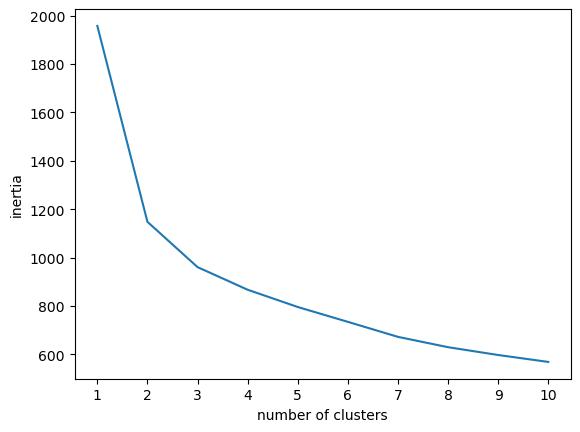

In [107]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

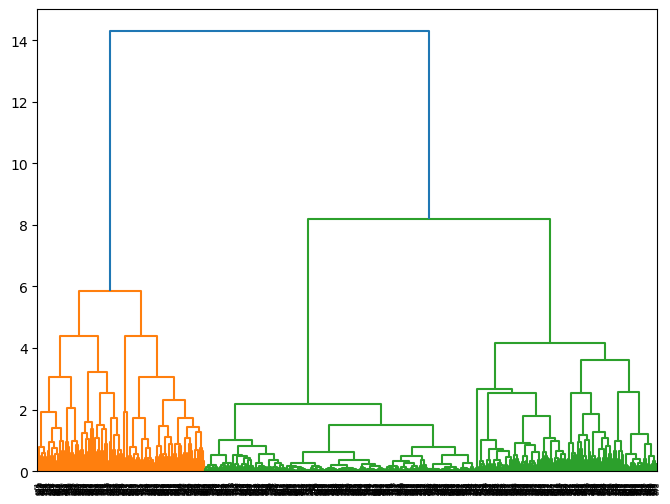

In [108]:
from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
df_value_sample = df_value.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(df_value_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### Using k = 2

In [109]:
df_value_k2 = df_value.copy()
model_k2 = sk.cluster.KMeans(n_clusters = 2, random_state = 1).fit(df_value_k2)

In [110]:
df_value_k2.head()

,Income,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_pday_card
0,0.473975,0.309746,0.849246,0.219450,0.562814,0.141206,0.618474,0.218959
1,0.475463,0.472630,0.924623,0.293370,0.462312,0.306533,0.184739,0.317671
2,0.480477,0.275701,0.095477,0.188265,0.914573,0.095477,0.112450,0.322044
3,0.419647,0.239653,0.000000,0.068145,0.020101,0.045226,0.056225,0.111750
4,0.513018,0.359813,0.282915,0.365558,0.164824,0.141206,0.297189,0.219386


In [111]:
df_value_k2["label"] = model_k2.labels_

In [112]:
df_value_k2.head()

,Income,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_pday_card,label
0,0.473975,0.309746,0.849246,0.219450,0.562814,0.141206,0.618474,0.218959,1
1,0.475463,0.472630,0.924623,0.293370,0.462312,0.306533,0.184739,0.317671,1
2,0.480477,0.275701,0.095477,0.188265,0.914573,0.095477,0.112450,0.322044,1
3,0.419647,0.239653,0.000000,0.068145,0.020101,0.045226,0.056225,0.111750,0
4,0.513018,0.359813,0.282915,0.365558,0.164824,0.141206,0.297189,0.219386,1


In [113]:
df_value_k2["label"].value_counts()

0    4472
1    2528
Name: label, dtype: int64

In [114]:
df_value_k2.groupby(["label"]).mean().transpose()

label,0,1
Income,0.246085,0.453681
MntMeat&Fish,0.091496,0.407380
MntEntries,0.039764,0.301696
MntVegan&Vegetarian,0.031495,0.241189
MntDrinks,0.040000,0.309430
MntDesserts,0.039381,0.306484
MntAdditionalRequests,0.096711,0.302162
Mnt_pday_card,0.049354,0.293871


### Using K=3

In [115]:
df_value_k3 = df_value.copy()
model_k3 = sk.cluster.KMeans(n_clusters = 3, random_state = 2).fit(df_value_k3)

In [116]:
df_value_k3["label"] = model_k3.labels_

In [117]:
df_value_k3.groupby(["label"]).describe()

Income                                                              \
        count      mean       std       min       25%       50%       75%   
label                                                                       
0      1286.0  0.455932  0.071726  0.124796  0.414450  0.460608  0.503226   
1      3834.0  0.227820  0.114543  0.000000  0.157719  0.222433  0.286967   
2      1880.0  0.418940  0.120040  0.003283  0.357348  0.405421  0.463214   

                MntMeat&Fish                                          \
            max        count      mean       std       min       25%   
label                                                                  
0      0.643044       1286.0  0.375976  0.201934  0.013351  0.224466   
1      1.000000       3834.0  0.054022  0.071742  0.000000  0.006676   
2      0.998652       1880.0  0.398088  0.215294  0.000200  0.234980   

                                    MntEntries                           \
            50%       75%       max      count      mean       std  min   
label                                                                     
0      0.344459  0.504673  0.996662     1286.0  0.430429  0.254804  0.0   
1      0.020694  0.074766  0.411883     3834.0  0.033129  0.053648  0.0   
2      0.381175  0.537049  1.000000     1880.0  0.138280  0.121522  0.0   

                                              MntVegan&Vegetarian            \
            25%       50%       75%       max               count      mean   
label                                                                         
0      0.206030  0.407035  0.613065  1.000000              1286.0  0.263567   
1      0.005025  0.015075  0.040201  0.597990              3834.0  0.020924   
2      0.040201  0.110553  0.202010  0.693467              1880.0  0.176277   

                                                                  MntDrinks  \
            std       min       25%       50%       75%       max     count   
label                                                                         
0      0.137653  0.029453  0.148418  0.252657  0.363825  0.576923    1286.0   
1      0.037874  0.000000  0.005198  0.010973  0.026565  0.953684    3834.0   
2      0.178248  0.004620  0.069300  0.120120  0.216707  1.000000    1880.0   

                                                                        \
           mean       std  min       25%       50%       75%       max   
label                                                                    
0      0.443123  0.252779  0.0  0.235427  0.422111  0.633166  1.000000   
1      0.032705  0.051853  0.0  0.005025  0.015075  0.040201  0.577889   
2      0.141420  0.130420  0.0  0.040201  0.110553  0.211055  0.693467   

      MntDesserts                                                         \
            count      mean       std  min       25%       50%       75%   
label                                                                      
0          1286.0  0.441171  0.255512  0.0  0.217337  0.432161  0.638191   
1          3834.0  0.032876  0.051109  0.0  0.005025  0.015075  0.040201   
2          1880.0  0.136975  0.126165  0.0  0.040201  0.105528  0.201005   

                MntAdditionalRequests                                     \
            max                 count      mean       std  min       25%   
label                                                                      
0      1.000000                1286.0  0.330501  0.240834  0.0  0.136546   
1      0.597990                3834.0  0.074235  0.085723  0.0  0.016165   
2      0.743719                1880.0  0.258893  0.221812  0.0  0.092369   

                                    Mnt_pday_card                      \
            50%       75%       max         count      mean       std   
label                                                                   
0      0.261044  0.485944  1.000000        1286.0  0.323339  0.146923   
1      0.044177  0.096386  0.638554        3834.0  0.032961

The model is creating a cluster around the outliers values

### Using K = 4

In [118]:
df_value_k4 = df_value.copy()
model_k4 = sk.cluster.KMeans(n_clusters = 4, random_state = 2).fit(df_value_k4)

In [124]:
df_value_k4["label"] = model_k4.labels_

Measuring distances between clusters

In [120]:
from sklearn.metrics.pairwise import euclidean_distances

dists_k3 = euclidean_distances(model_k3.cluster_centers_)
dists_k3

array([[0.        , 0.92650718, 0.54174967],
       [0.92650718, 0.        , 0.53238459],
       [0.54174967, 0.53238459, 0.        ]])

In [121]:
dists_k4 = euclidean_distances(model_k4.cluster_centers_)
dists_k4

array([[0.        , 0.96758771, 0.58888552, 0.61342839],
       [0.96758771, 0.        , 0.57623695, 0.62974347],
       [0.58888552, 0.57623695, 0.        , 0.47287068],
       [0.61342839, 0.62974347, 0.47287068, 0.        ]])

### Visualization

In [149]:
cluster0 = df_value_k2[df_value_k2.label == 0]
cluster1 = df_value_k2[df_value_k2.label == 1]


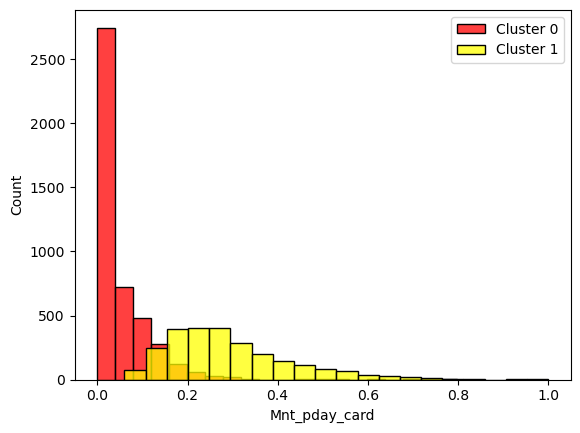

In [150]:
sns.histplot(cluster0['Mnt_pday_card'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Mnt_pday_card'],color='yellow',label='Cluster 1', bins = 20)
plt.legend()

In [151]:
cluster0 = df_value_k3[df_value_k3.label == 0]
cluster1 = df_value_k3[df_value_k3.label == 1]
cluster2 = df_value_k3[df_value_k3.label == 2]

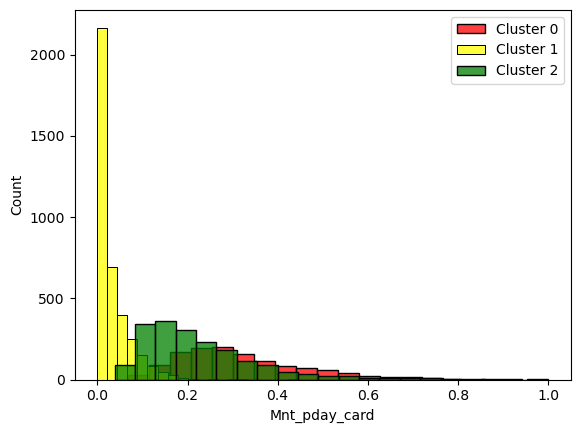

In [152]:
sns.histplot(cluster0['Mnt_pday_card'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Mnt_pday_card'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Mnt_pday_card'],color='green',label='Cluster 2', bins = 20)
plt.legend()

In [159]:
cluster0 = df_value_k4[df_value_k4.label == 0]
cluster1 = df_value_k4[df_value_k4.label == 1]
cluster2 = df_value_k4[df_value_k4.label == 2]
cluster3 = df_value_k4[df_value_k4.label == 3]

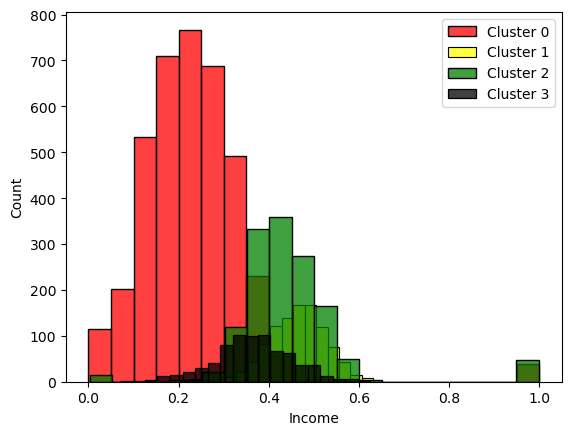

In [160]:
sns.histplot(cluster0['Income'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Income'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Income'],color='green',label='Cluster 2', bins = 20)
sns.histplot(cluster3['Income'],color='k',label='Cluster 3', bins = 20)
plt.legend()